# **Here i have performed Exploratory Data Analysis on this dataset before applying Linear Regression model to it. kindly let me know in comments if any suggestions or improvents needed. Always happy to get inputs from fellow learners.**

### Import the Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data from csv file

In [2]:
df = pd.read_csv('../input/fargo-real-estate-data/Regression-Analysis-Data.csv')
df

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
927,928,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,929,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,930,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,931,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


In [3]:
# checking top 5 rows
df.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [4]:
# checking bottom 5 rows
df.tail()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
927,928,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,929,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,930,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,931,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000


In [5]:
# checking the shape
df.shape

(932, 10)

We can observe from the dataset that the observation column is not needed as it just displays the observation no for each record, we already have index for the same. so we will drop the observation column.

In [6]:
df = df.drop('Observation',axis = 1)
df

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


We will check the distribution of the target variable.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House_Price', ylabel='Density'>

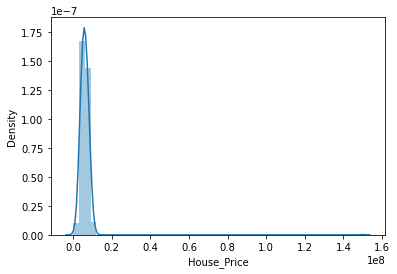

In [7]:
sns.distplot(df['House_Price']) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='House_Price'>

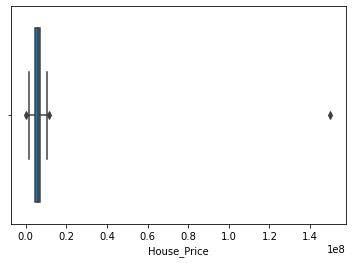

In [8]:
sns.boxplot(df['House_Price'])

We can observe that the distribution is skewed and we are able to observe outliers also.

We will remove the outliers from our data.

In [9]:
hp = sorted(df['House_Price'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1)) 
upper_bound = q3 + (1.5 * (q3-q1))
below = df['House_Price'] > lower_bound
above = df['House_Price'] < upper_bound
df = df[below & above]

In [10]:
df.shape

(929, 9)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='House_Price'>

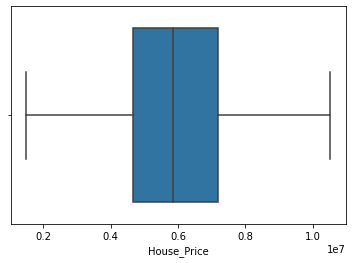

In [11]:
sns.boxplot(df["House_Price"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House_Price', ylabel='Density'>

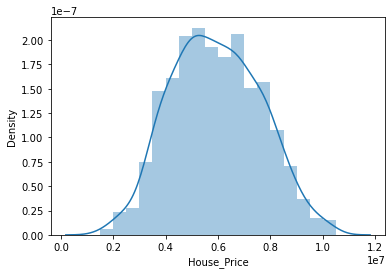

In [12]:
sns.distplot(df['House_Price'])

Now we are able to make a normal distribution 
Now we will check if there is any null value present in our dataset.

In [13]:
df.isnull().sum()

Dist_Taxi        12
Dist_Market      12
Dist_Hospital     0
Carpet            7
Builtup          14
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64

We can remove the missing values or we can impute them . Here we will go further by removing the missing values.

In [14]:
df_new = df.dropna()
df_new.shape

(896, 9)

Now we will check if there is any categorical data in our dataset.

In [15]:
df_new.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

There are two features with the categorical data namely 'Parking' & 'City_Category'

In [16]:
df_new.City_Category.value_counts()

CAT B    347
CAT A    316
CAT C    233
Name: City_Category, dtype: int64

In [17]:
df_new.Parking.value_counts()

Open            353
Not Provided    223
Covered         180
No Parking      140
Name: Parking, dtype: int64

Here we can convert the categorical values into numerical by using labelencoding and then onehot encoding on the label encoded data. Or we can use get_dummies from Pandas Dataframe. We will go ahead with the get_dummies option.

In [18]:
df_dum = pd.get_dummies(df_new)
df_dum

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,City_Category_CAT A,City_Category_CAT B,City_Category_CAT C
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,0,0,0,1,0,1,0
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,0,0,1,0,0,1,0
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,0,0,1,0,1,0,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,1,0,0,0,0,1,0
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,1080,6639000,1,0,0,0,0,0,1
928,7214.0,8717.0,10553.0,1387.0,1663.0,850,8208000,0,0,0,1,1,0,0
929,7423.0,11708.0,13220.0,1200.0,1436.0,1060,7644000,0,0,0,1,1,0,0
930,15082.0,14700.0,19617.0,1299.0,1560.0,770,9661000,0,0,0,1,0,1,0


We will check the correlation of the features

In [19]:
df_dum.corr()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,City_Category_CAT A,City_Category_CAT B,City_Category_CAT C
Dist_Taxi,1.000000,0.453358,0.795513,0.009567,0.009135,0.013658,0.105436,-0.074152,0.076657,0.042658,-0.033906,0.024183,-0.048911,0.027975
Dist_Market,0.453358,1.000000,0.621458,-0.019532,-0.019080,0.070002,0.119684,-0.032520,0.041887,0.025594,-0.027106,0.091193,-0.101434,0.013310
Dist_Hospital,0.795513,0.621458,1.000000,0.012221,0.012501,0.046897,0.133424,-0.070787,0.095172,0.032512,-0.041444,0.057047,-0.071797,0.017592
Carpet,0.009567,-0.019532,0.012221,1.000000,0.998885,-0.044216,0.089532,0.062863,0.004933,-0.042770,-0.017366,-0.053989,0.048914,0.004488
Builtup,0.009135,-0.019080,0.012501,0.998885,1.000000,-0.044194,0.090396,0.063610,0.004566,-0.045495,-0.015296,-0.053108,0.048464,0.004029
Rainfall,0.013658,0.070002,0.046897,-0.044216,-0.044194,1.000000,0.013431,0.015692,-0.055569,-0.029515,0.054542,0.033504,-0.014883,-0.019966
House_Price,0.105436,0.119684,0.133424,0.089532,0.090396,0.013431,1.000000,0.116426,-0.074770,-0.047725,0.002322,0.638224,-0.188684,-0.485644
Parking_Covered,-0.074152,-0.032520,-0.070787,0.062863,0.063610,0.015692,0.116426,1.000000,-0.215766,-0.288619,-0.404266,0.049658,-0.061242,0.013919
Parking_No Parking,0.076657,0.041887,0.095172,0.004933,0.004566,-0.055569,-0.074770,-0.215766,1.000000,-0.247713,-0.346969,-0.002412,-0.020310,0.025182
Parking_Not Provided,0.042658,0.025594,0.032512,-0.042770,-0.045495,-0.029515,-0.047725,-0.288619,-0.247713,1.000000,-0.464122,0.007308,0.008676,-0.017595


Basis on degree of freedom, doing feature selection to remove 1 level in both the categorical data

In [20]:
df_dum = df_dum.drop(['Parking_Open','City_Category_CAT C'],axis = 1)
df_dum

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,Parking_Covered,Parking_No Parking,Parking_Not Provided,City_Category_CAT A,City_Category_CAT B
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,0,0,0,0,1
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,0,0,1,0,1
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,0,0,1,1,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,1,0,0,0,1
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,1080,6639000,1,0,0,0,0
928,7214.0,8717.0,10553.0,1387.0,1663.0,850,8208000,0,0,0,1,0
929,7423.0,11708.0,13220.0,1200.0,1436.0,1060,7644000,0,0,0,1,0
930,15082.0,14700.0,19617.0,1299.0,1560.0,770,9661000,0,0,0,0,1


Now we will divide the dataset into dependent and independent varaibles


In [21]:
# Independent variable
X = df_dum.drop('House_Price',axis=1)
X

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,Parking_Covered,Parking_No Parking,Parking_Not Provided,City_Category_CAT A,City_Category_CAT B
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,0,0,0,0,1
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,0,0,1,0,1
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,0,0,1,1,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,1,0,0,0,1
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,1080,1,0,0,0,0
928,7214.0,8717.0,10553.0,1387.0,1663.0,850,0,0,0,1,0
929,7423.0,11708.0,13220.0,1200.0,1436.0,1060,0,0,0,1,0
930,15082.0,14700.0,19617.0,1299.0,1560.0,770,0,0,0,0,1


In [22]:
# Dependent Variable
Y = df_dum['House_Price']
Y

0      6649000
1      3982000
2      5401000
3      5373000
4      4662000
        ...   
927    6639000
928    8208000
929    7644000
930    9661000
931    5434000
Name: House_Price, Length: 896, dtype: int64

Now we will split the data into Training and Testing data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

In [25]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((627, 11), (269, 11), (627,), (269,))

Now after the data is distributed into training and testing data. We will perform Linear Regression on the data.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(train_x,train_y)

LinearRegression()

In [29]:
y_pred = model.predict(test_x)
y_pred

array([5213079.79717876, 6401098.45152837, 4318701.94329194,
       4075044.75309119, 4405874.05161154, 3790227.18197541,
       7232587.30587647, 7000920.31832146, 7235516.457118  ,
       7931493.38120051, 5641414.92954666, 6329657.12516479,
       4088122.36774933, 5567907.54155755, 7752420.00984116,
       7040487.1719388 , 7833726.30925018, 5291593.97520999,
       4203800.44014293, 5886512.69636956, 5162157.86825931,
       5347790.7721907 , 4456695.96995509, 4967580.65869272,
       5316007.43089882, 5510803.06479311, 4779566.55609762,
       5542966.14730394, 5719036.36640897, 5431379.97216584,
       7191782.92768867, 4481349.97776915, 7244448.21493108,
       5314687.56321596, 5268235.29996104, 3675475.39765205,
       5347499.89989689, 8231810.09214023, 6303714.70859189,
       4867132.99729271, 7727307.68526046, 7670046.69160802,
       4664095.95917961, 3202846.91126858, 8048125.97859958,
       5333186.74808847, 5814874.97246042, 8063567.75645859,
       7437806.47086641,

We will check the accuracy now

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(test_y,y_pred)

0.512717910488099